Разбор дата сета - HOUSING

In [88]:
HOUSING_PATH = "data/housing.csv"

In [114]:
import pandas as pd

housing = pd.read_csv(HOUSING_PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [115]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [116]:
# категориальные переменные
housing["ocean_proximity"].value_counts()

#housing["ocean_proximity"].value_counts(normalize = True)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [117]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23a278d0>,
      dtype=object)

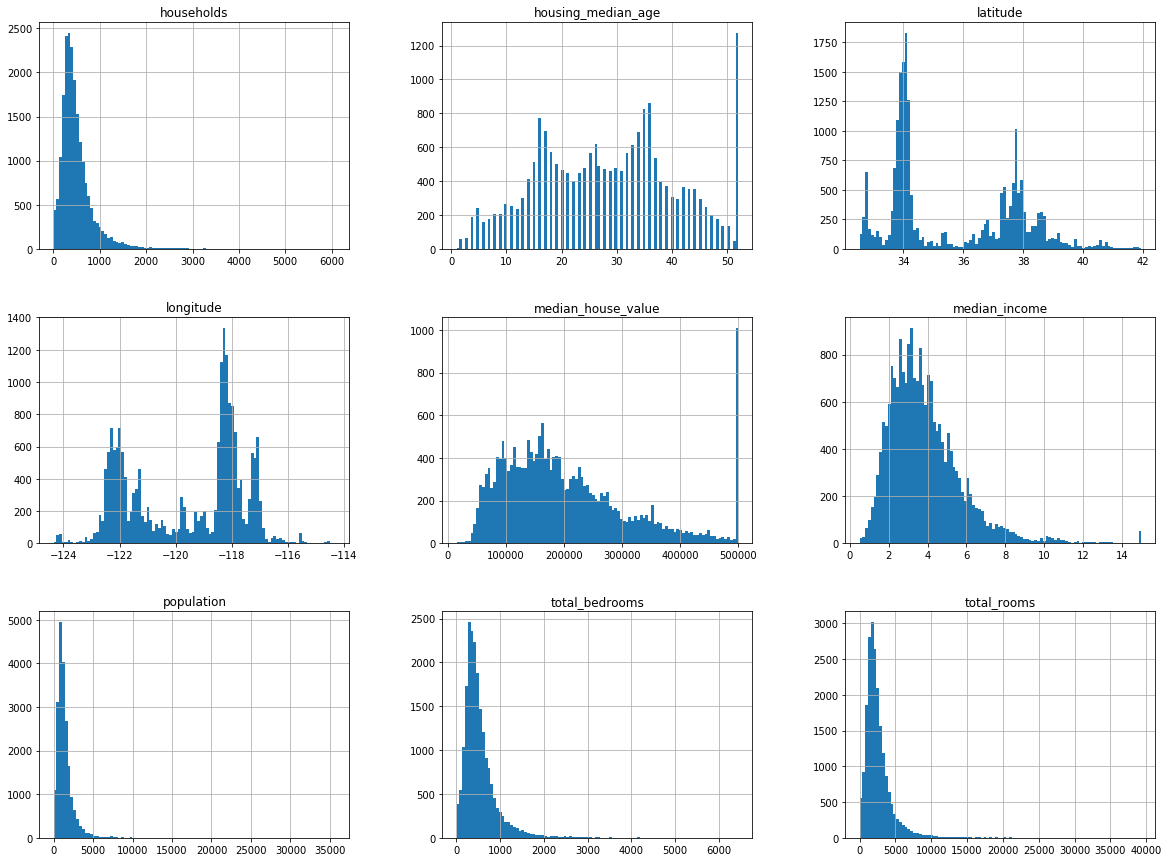

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=100, figsize=(20,15))

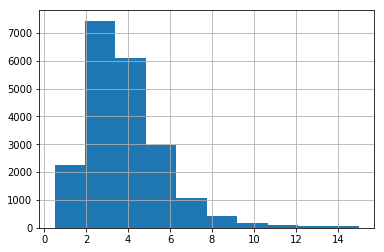

In [96]:
housing.median_income.hist()

In [35]:
# corr_matrix = housing.corr()
# corr_matrix["median_house_value"].sort_values(ascending=False)

In [36]:
# import numpy as np
# np.random.seed(42)

# Обработка нулевых/пропущенных значений

В реальных данных часто встречаются пропущенные значения, важно уметь их правильно обрабатывать.
Как это не стоит делать в большинстве случаев:
    1. Удалить столбец(переменную, фичу, параметр), содержащий нулевое значение (очень большая потеря информации)
    2. Удалить строки, в которых атрибут равен нулевому значению (средняя или большая потеря информации)
    
=> Надо заменять нулевые ячейки на какие-то значения, но на какие именно?

Можно встретить в литературе/статьях:
    1. Замена на среднее значение, медиану, моду
    2. Indicator Method - замена пропущенных значений нулями и создание новой переменной индикатора (где она принимает значение 1 при наличение пропуска и 0 в остальных случаях)
    3. Повторение результата последнего наблюдения
    4. Восстановление пропуском на основе регрессионных моделей

In [99]:
housing.total_bedrooms.value_counts().iloc[:10]

280.0    55
331.0    51
345.0    50
393.0    49
343.0    49
348.0    48
328.0    48
394.0    48
272.0    47
309.0    47
Name: total_bedrooms, dtype: int64

In [103]:
housing.total_bedrooms2 = housing.total_bedrooms.fillna(value = 45).value_counts(dropna = False).iloc[:10]

/Users/k.gusev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [104]:
housing.total_bedrooms2.mean()

65.7

In [105]:
housing.total_bedrooms.median()

435.0

In [57]:
# housing[['ocean_proximity', 'total_bedrooms']].groupby('ocean_proximity').mean()

# Категорийные атрибуты

Пример категорийного атрибута - 'ocean_proximity'.
В зависимости от типа данных, такие атрибуты преобразуются либо в порядковые значения (нам важно указать порядок), либо в бинарные параметры.

Например, атрибут "расстояние" со значениеми ['близко', 'средне', 'далеко'] можно преобразовать в атрибут со значениями [0,2,3], либо в три новых атрибута "расстояние_близко", "расстояние_среднее", "расстояние_далеко" со значениями 1/0.


In [107]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([3, 3, 3, ..., 1, 1, 1])

In [78]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.toarray() 

/Users/k.gusev/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [108]:
pd.get_dummies(housing["ocean_proximity"]).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


# Масштабирование данных 

Зачем масштабировать данные?
Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

In [80]:
from IPython.display import Image

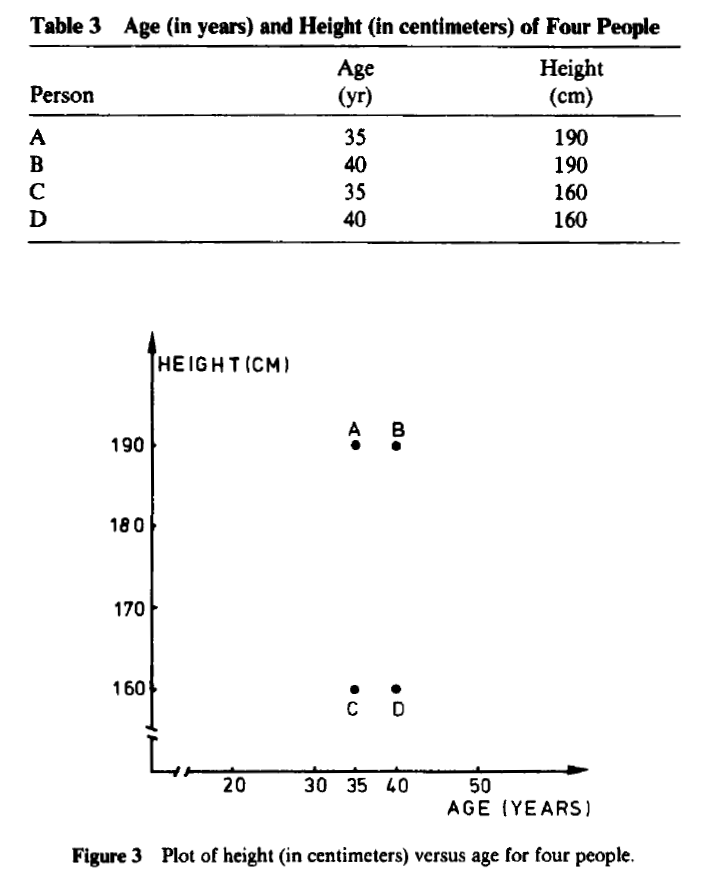

In [81]:
Image('Ppu5Y.png')

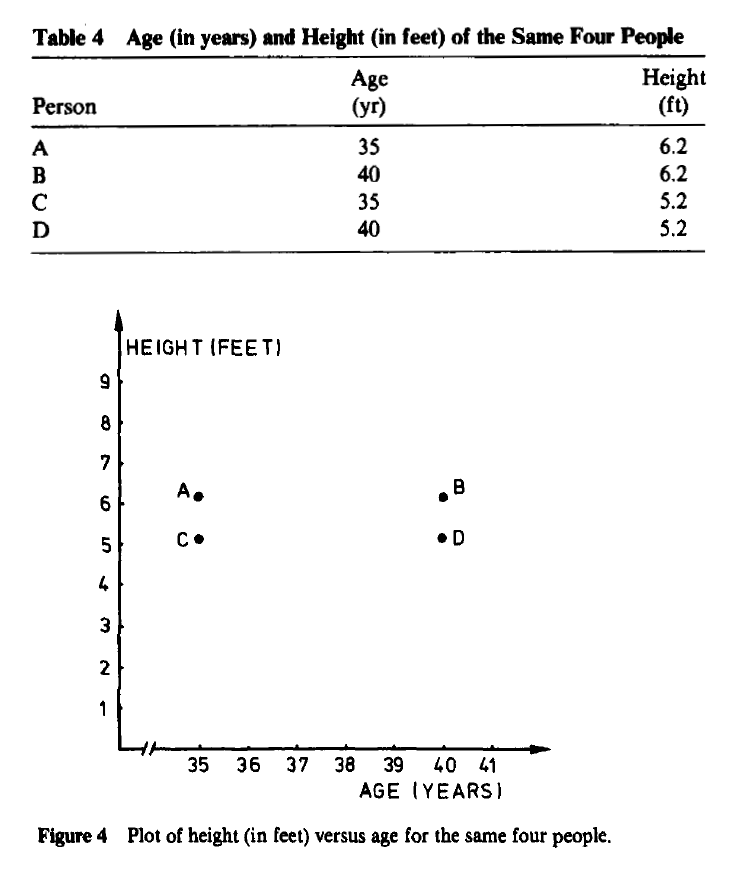

In [82]:
Image('zW6rI.png')

..

## Визуализация

In [15]:
housing = strat_train_set.copy()

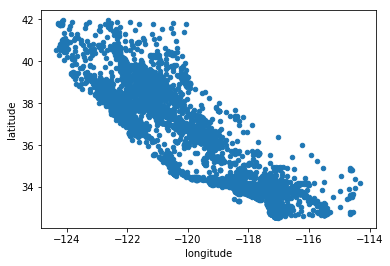

In [109]:
_ = housing.plot(kind="scatter", x="longitude", y="latitude")

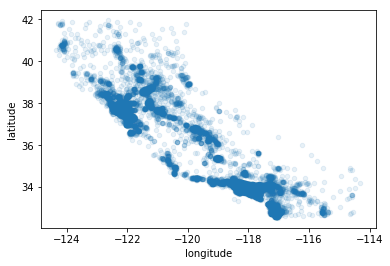

In [17]:
_ = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

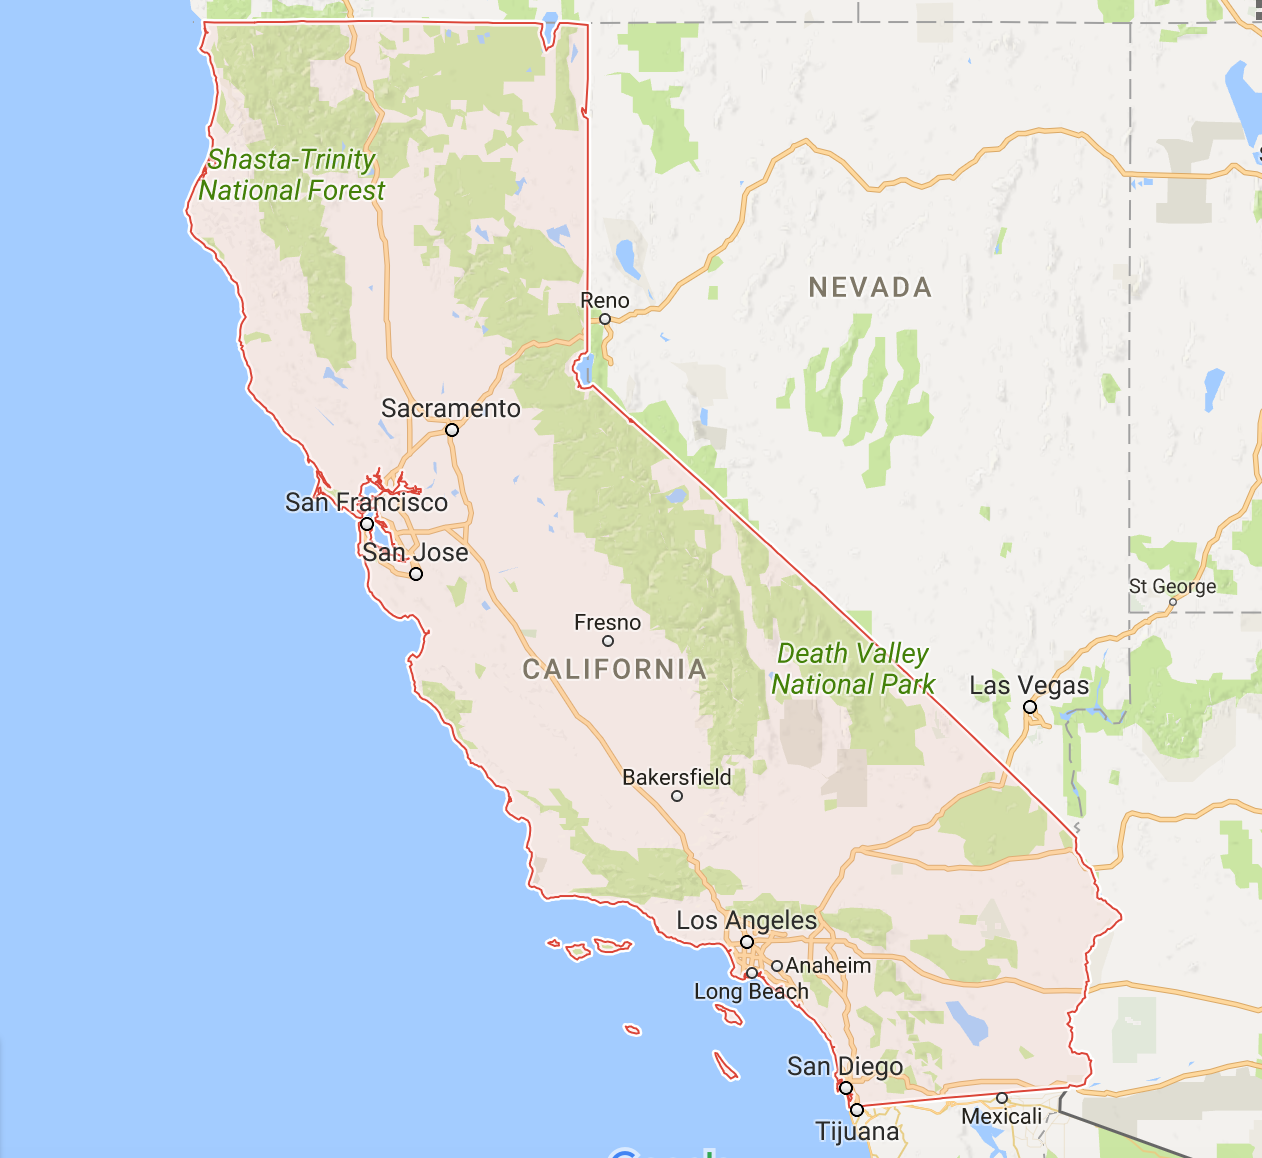

In [86]:
Image('calfornia.png')

In [110]:
import matplotlib.pyplot as plt

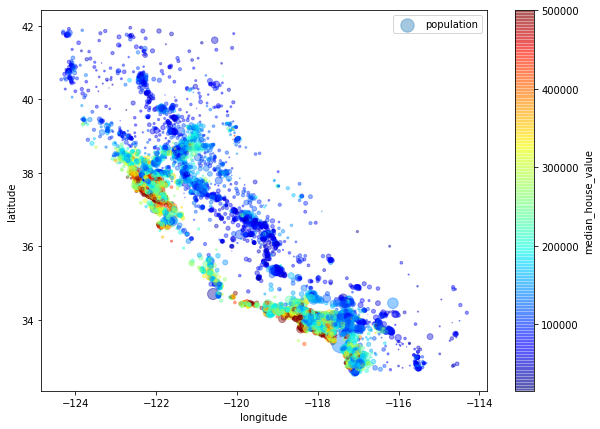

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
_ = plt.legend()

In [20]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [111]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


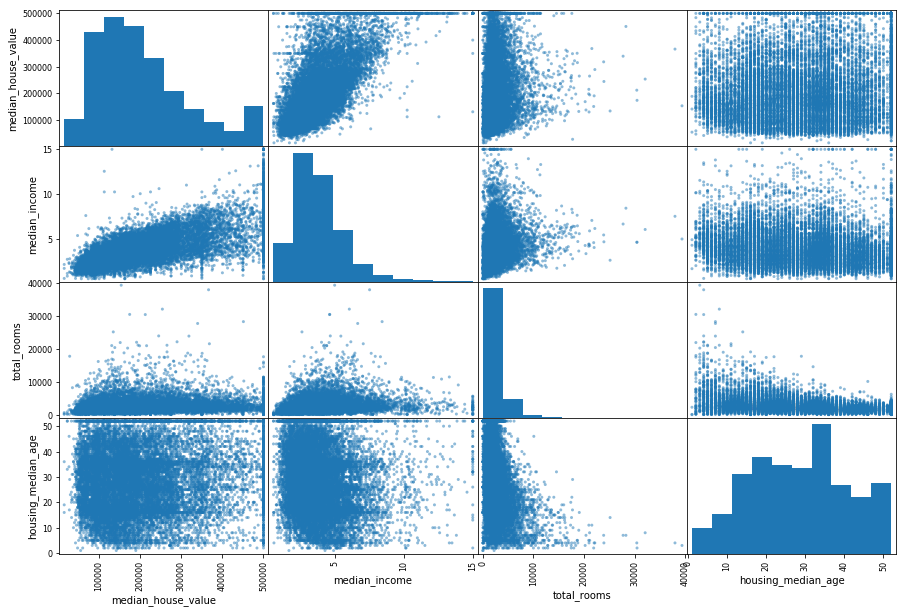

In [21]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
_ = scatter_matrix(housing[attributes], figsize=(15, 10))

[0, 16, 0, 550000]

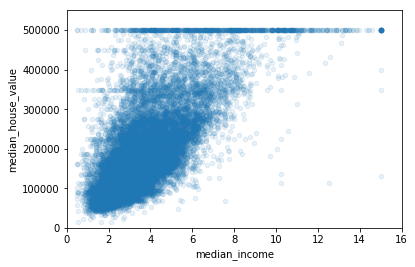

In [22]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [23]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [87]:
housing.population_per_household.describe()

count    16512.000000
mean         3.096437
std         11.584826
min          0.692308
25%          2.431287
50%          2.817653
75%          3.281420
max       1243.333333
Name: population_per_household, dtype: float64

In [25]:
housing["population_per_household"].describe(percentiles=[0.999])

count    16512.000000
mean         3.096437
std         11.584826
min          0.692308
50%          2.817653
99.9%       13.050699
max       1243.333333
Name: population_per_household, dtype: float64

In [30]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### Создание из непрерывной - категориальной фичи

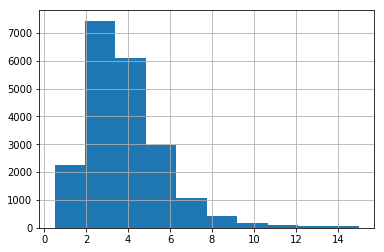

In [112]:
housing["median_income"].hist()

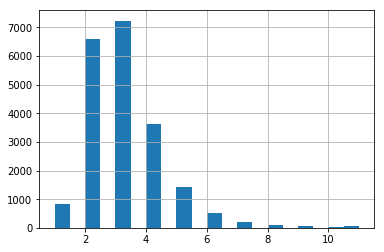

In [113]:
#деление на 1.5 и округление до целой части
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].hist(bins=20)

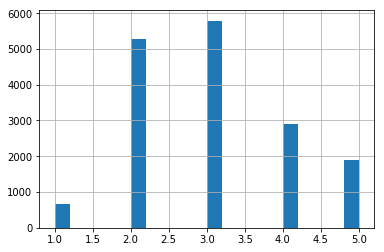

In [43]:
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].hist(bins=20)

# Домашняя работа

1. Масштабирование:
    а. Нормализовать признак - median_income
    б. Привести признак - population к масштабу от 0 до 100
    
2. Заполнение пропусков:
    а. Заполнить пропуски в столбце total_bedrooms средними значениями по категориям столбца ocean_proximity
    Например, если пропущенно значение в строке с категорией INLAND, нужно заполнить его средним значением по этой категории
    
3. Категорийные атрибуты:
    а. Посчитать среднее кол-во комнат в строке (total_rooms/households)
    б. Разбить полученный столбец на группы на ваше усмотрение (Например, 1 комната, 2 комнаты, 3 и более комнат)